In [1]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
from google.colab import userdata

In [3]:
proj_id=userdata.get('BQ_Project_ID')

project = proj_id #concrete-domain-397419' # replace <project id> with your own project id
location = 'US' #this is the default location
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [4]:
sql_query = f"""
    SELECT *
    FROM `eminent-booking-471117-m3.1.mimic_pneumonia_cohort_full`
    LIMIT 10
"""
df = client.query(sql_query).to_dataframe()
print (df)

  Group_Name                    Term  \
0  Pneumonia  aspiration pneumonitis   
1  Pneumonia    aspiration pneumonia   
2  Pneumonia  aspiration pneumonitis   
3  Pneumonia    aspiration pneumonia   
4  Pneumonia    aspiration pneumonia   
5  Pneumonia  aspiration pneumonitis   
6  Pneumonia  aspiration pneumonitis   
7  Pneumonia    aspiration pneumonia   
8  Pneumonia  aspiration pneumonitis   
9  Pneumonia    aspiration pneumonia   

                                          DOID ICD10Code  subject_id  \
0     http://purl.obolibrary.org/obo/DOID_3240     J69.0    13263248   
1  http://purl.obolibrary.org/obo/DOID_0050152     J69.0    13263248   
2     http://purl.obolibrary.org/obo/DOID_3240     J69.0    13263248   
3  http://purl.obolibrary.org/obo/DOID_0050152     J69.0    13263248   
4  http://purl.obolibrary.org/obo/DOID_0050152     J69.0    19226487   
5     http://purl.obolibrary.org/obo/DOID_3240     J69.0    19226487   
6     http://purl.obolibrary.org/obo/DOID_3240     J69.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
df.columns

Index(['Group_Name', 'Term', 'DOID', 'ICD10Code', 'subject_id', 'hadm_id',
       'stay_id', 'gender', 'dod', 'admittime',
       ...
       'sodium_max_1', 'charttime', 'specimen_id', 'crp', 'urineoutput',
       'height', 'weight_admit', 'weight', 'weight_min', 'weight_max'],
      dtype='object', length=196)

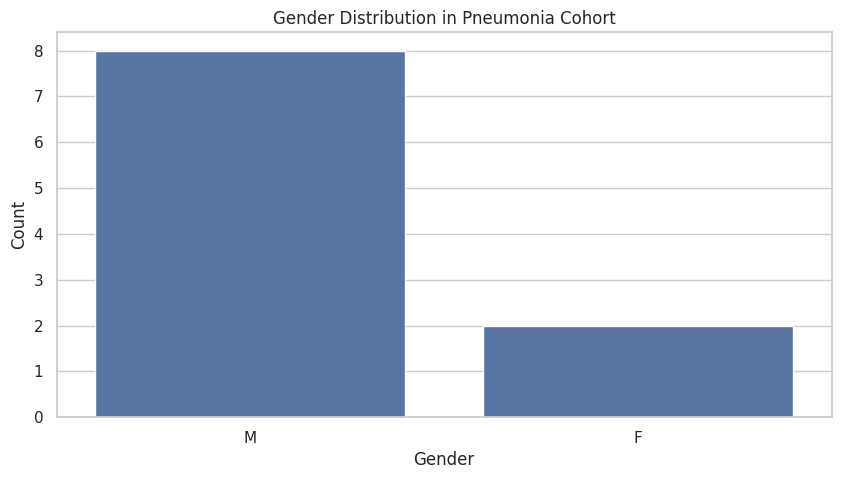

In [7]:
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution in Pneumonia Cohort")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [12]:
[x for x in df.columns if "time" in x.lower()]



['admittime',
 'dischtime',
 'icu_intime',
 'icu_outtime',
 'admittime_1',
 'dischtime_1',
 'deathtime',
 'charttime']

In [13]:
[x for x in df.columns if "los" in x.lower()]


['los_hospital', 'los_icu', 'los_hours']

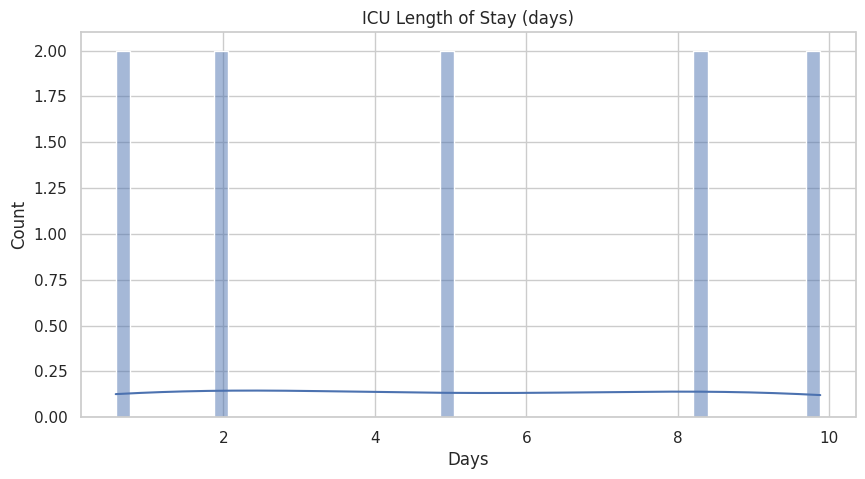

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df["los_icu"], bins=50, kde=True)
plt.title("ICU Length of Stay (days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


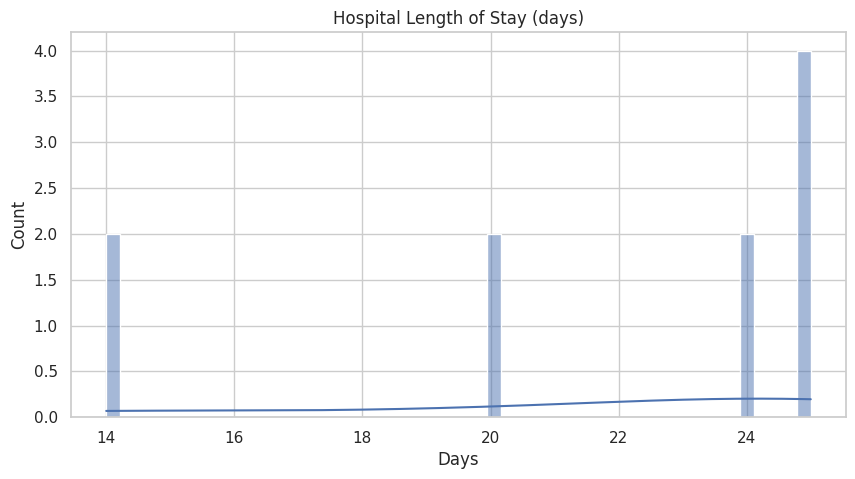

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df["los_hospital"], bins=50, kde=True)
plt.title("Hospital Length of Stay (days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


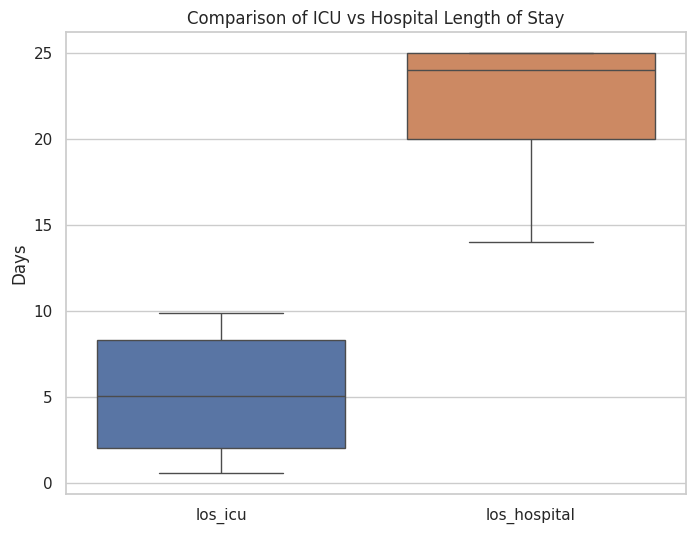

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[["los_icu", "los_hospital"]])
plt.title("Comparison of ICU vs Hospital Length of Stay")
plt.ylabel("Days")
plt.show()


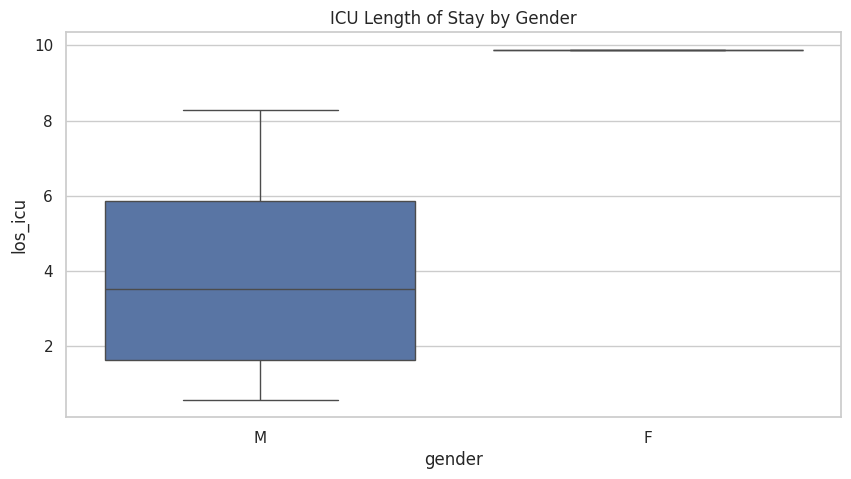

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="gender", y="los_icu", data=df)
plt.title("ICU Length of Stay by Gender")
plt.show()


In [19]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [23]:
!apt-get install graphviz
!pip install graphviz
from graphviz import Digraph


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [25]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


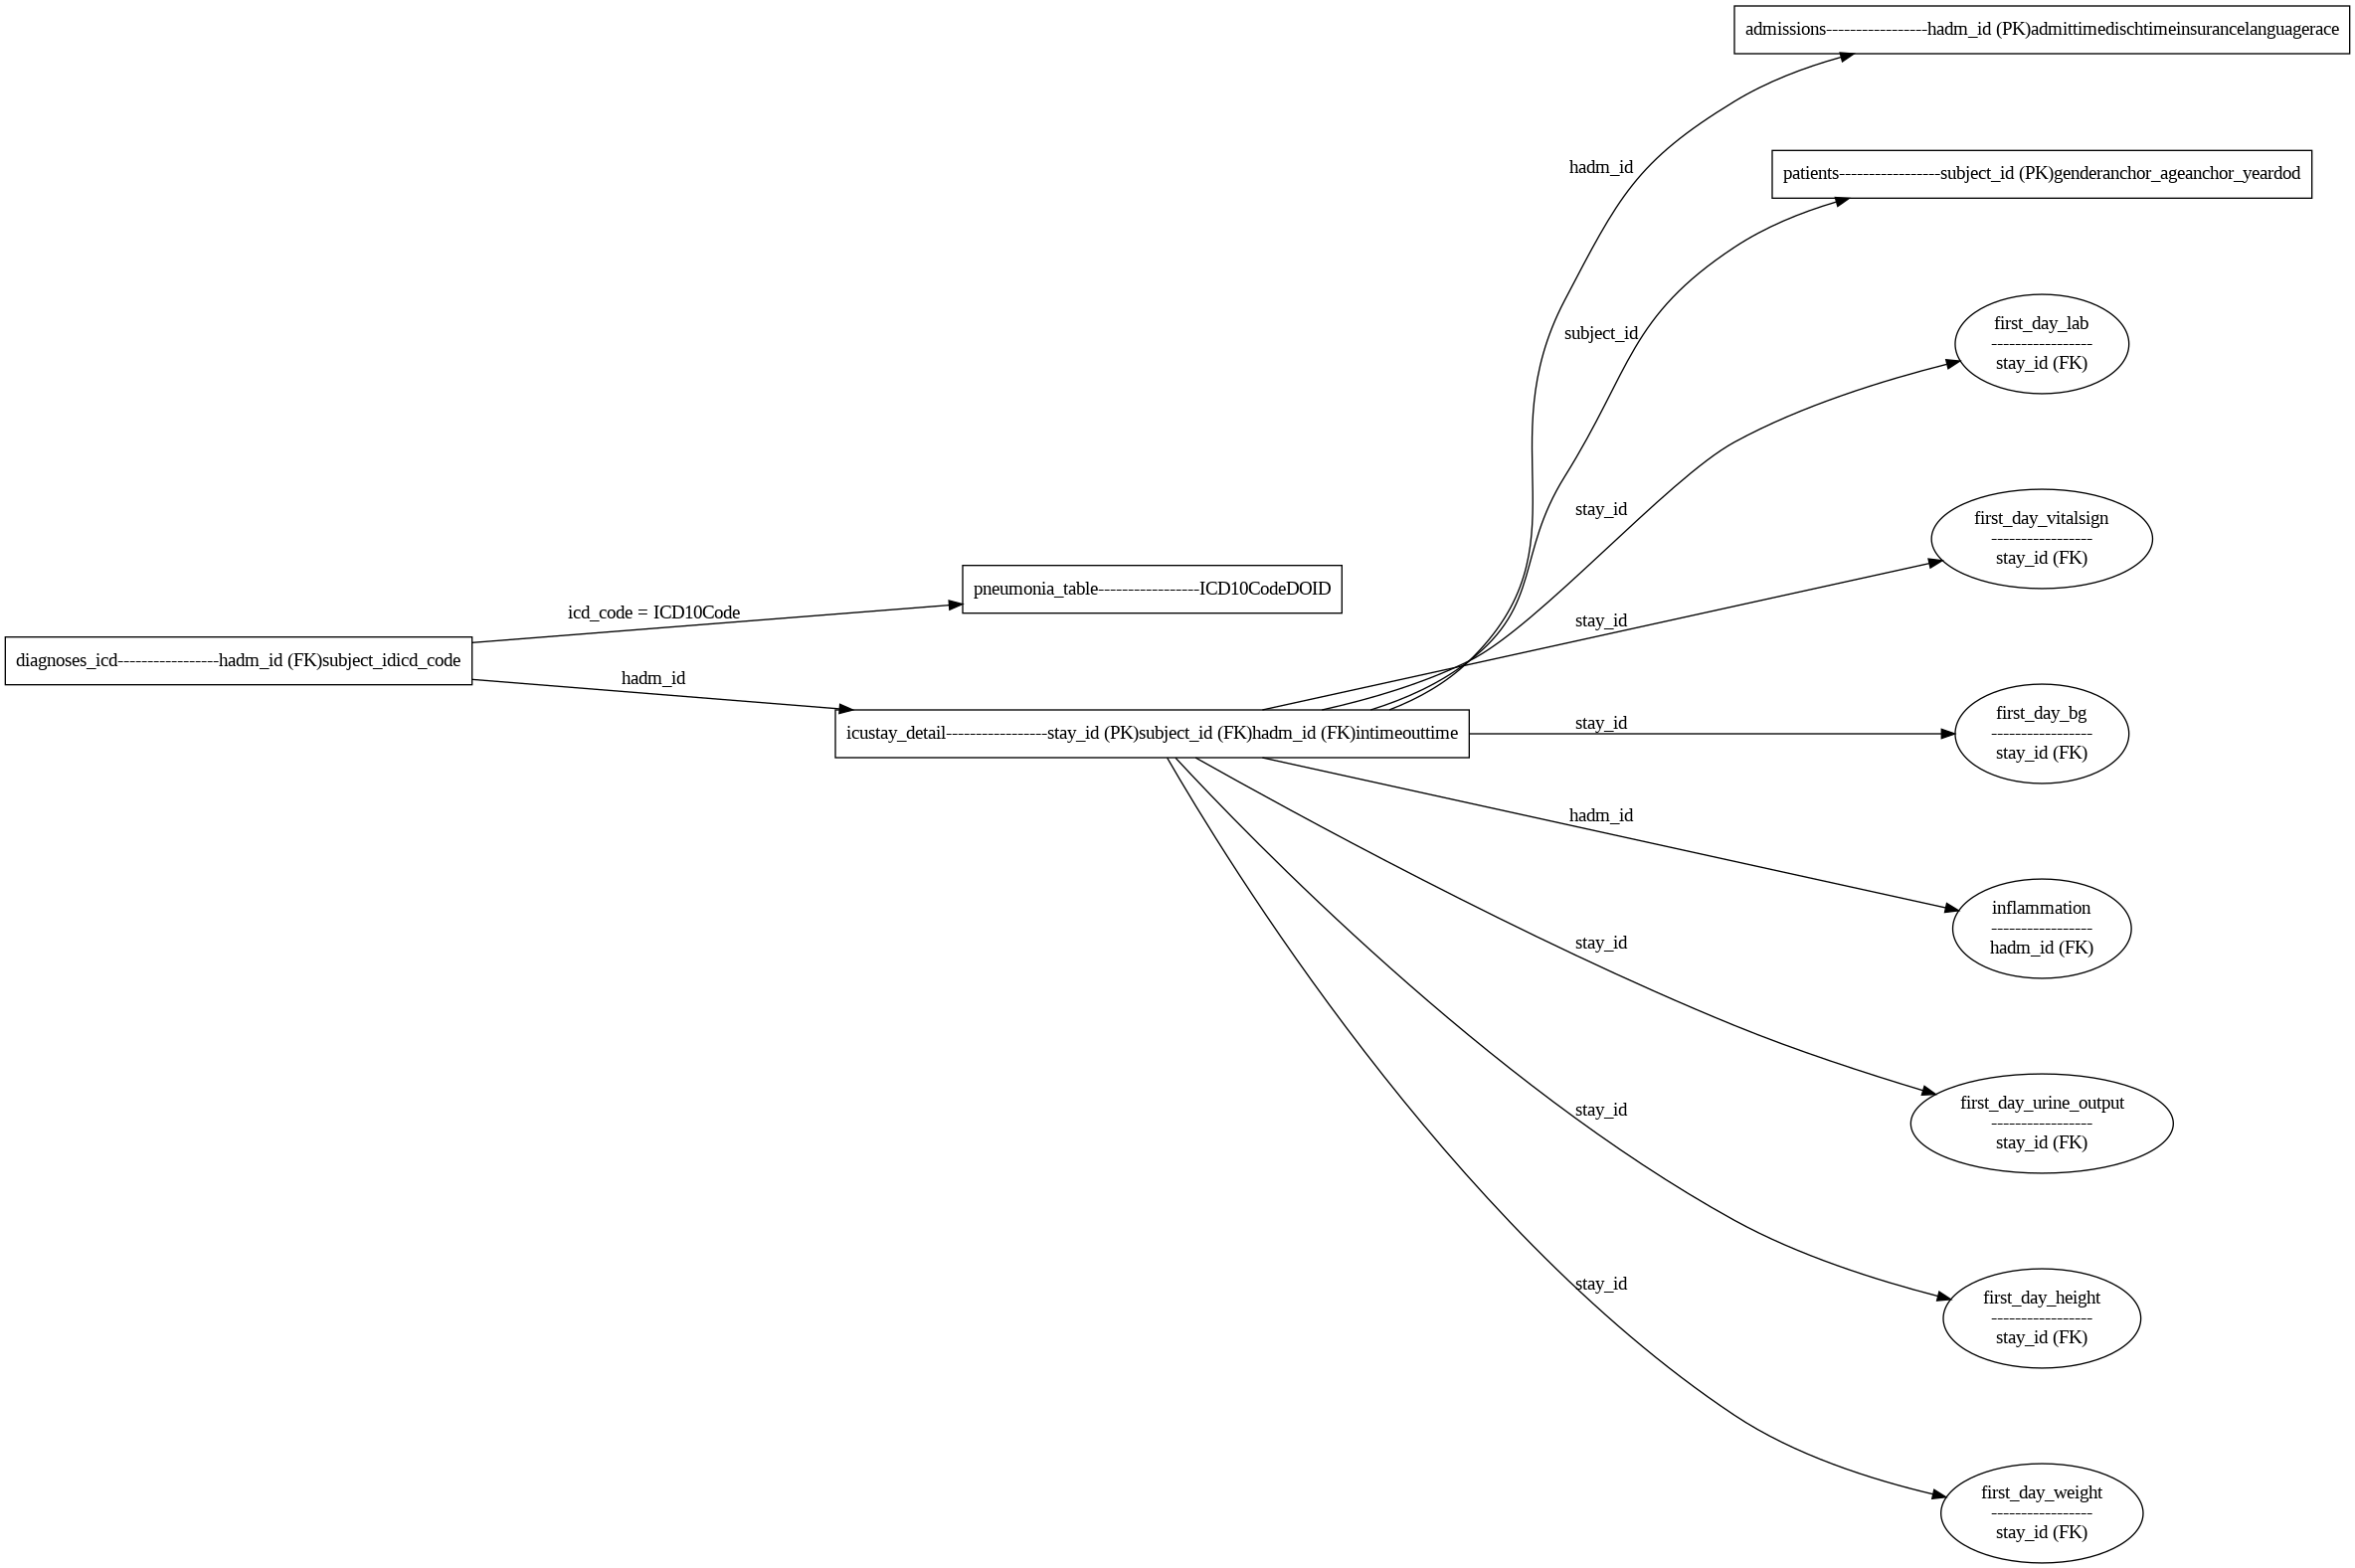

In [27]:
from graphviz import Digraph

# ----------------------------------------
# 1) 初始化图
# ----------------------------------------
erd = Digraph('ERD_Pneumonia_ICU', format='png')
erd.attr(rankdir='LR', fontsize='12', nodesep='1', ranksep='2')

# ----------------------------------------
# 2) 定义表节点（你要求的那种矩形 + 字段列表）
# ----------------------------------------

erd.node('diagnoses_icd',
         '''diagnoses_icd
-----------------
hadm_id (FK)
subject_id
icd_code''',
         shape='record')

erd.node('pneumonia_table',
         '''pneumonia_table
-----------------
ICD10Code
DOID''',
         shape='record')

erd.node('icustay_detail',
         '''icustay_detail
-----------------
stay_id (PK)
subject_id (FK)
hadm_id (FK)
intime
outtime''',
         shape='record')

erd.node('admissions',
         '''admissions
-----------------
hadm_id (PK)
admittime
dischtime
insurance
language
race''',
         shape='record')

erd.node('patients',
         '''patients
-----------------
subject_id (PK)
gender
anchor_age
anchor_year
dod''',
         shape='record')

# Derived tables (only keys shown)
erd.node('first_day_lab', '''first_day_lab
-----------------
stay_id (FK)''')

erd.node('first_day_vitalsign', '''first_day_vitalsign
-----------------
stay_id (FK)''')

erd.node('first_day_bg', '''first_day_bg
-----------------
stay_id (FK)''')

erd.node('inflammation', '''inflammation
-----------------
hadm_id (FK)''')

erd.node('first_day_urine_output', '''first_day_urine_output
-----------------
stay_id (FK)''')

erd.node('first_day_height', '''first_day_height
-----------------
stay_id (FK)''')

erd.node('first_day_weight', '''first_day_weight
-----------------
stay_id (FK)''')


# ----------------------------------------
# 3) 画出 JOIN 关系（完全按你们小组写的 SQL）
# ----------------------------------------

# diagnoses_icd → pneumonia_table
erd.edge('diagnoses_icd', 'pneumonia_table', label='icd_code = ICD10Code')

# diagnoses_icd → icustay_detail
erd.edge('diagnoses_icd', 'icustay_detail', label='hadm_id')

# icustay_detail → admissions
erd.edge('icustay_detail', 'admissions', label='hadm_id')

# icustay_detail → patients
erd.edge('icustay_detail', 'patients', label='subject_id')

# Derived tables
erd.edge('icustay_detail', 'first_day_lab', label='stay_id')
erd.edge('icustay_detail', 'first_day_vitalsign', label='stay_id')
erd.edge('icustay_detail', 'first_day_bg', label='stay_id')
erd.edge('icustay_detail', 'inflammation', label='hadm_id')
erd.edge('icustay_detail', 'first_day_urine_output', label='stay_id')
erd.edge('icustay_detail', 'first_day_height', label='stay_id')
erd.edge('icustay_detail', 'first_day_weight', label='stay_id')

# 4) 渲染并输出
output_path = erd.render('ERD_Pneumonia_ICU', format='png')

from IPython.display import Image
Image(filename=output_path)



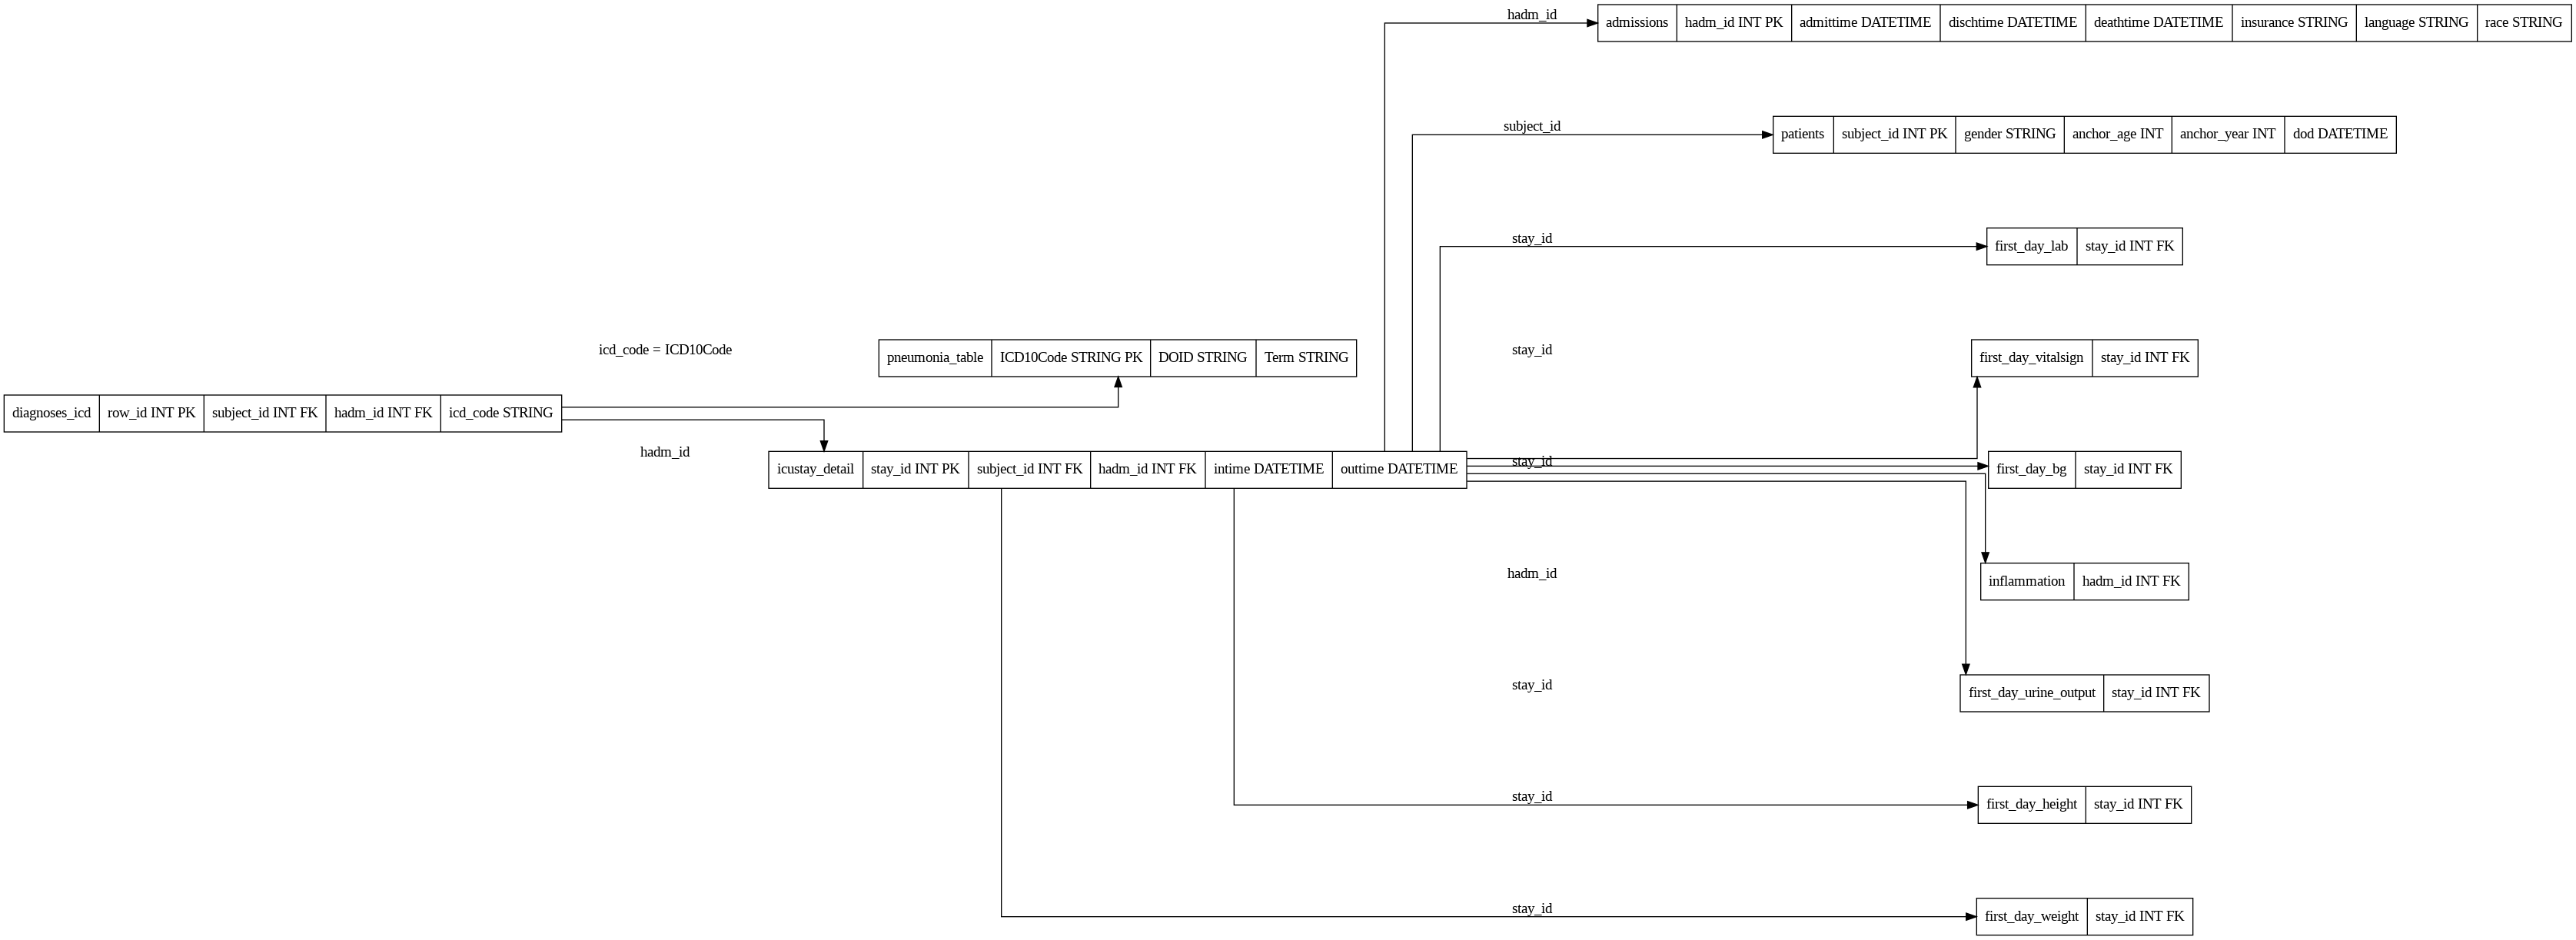

In [29]:
!pip install graphviz

from graphviz import Digraph

erd = Digraph('ERD_Pneumonia_ICU', format='png')
erd.attr(rankdir='LR', splines='ortho', nodesep='1', ranksep='1')

# ------------------------------
# 1. diagnoses_icd
# ------------------------------
erd.node('diagnoses_icd', '''{
diagnoses_icd |
  row_id INT PK |
  subject_id INT FK |
  hadm_id INT FK |
  icd_code STRING
}''', shape='record')

# ------------------------------
# 2. pneumonia_table (your DOID mapping table)
# ------------------------------
erd.node('pneumonia_table', '''{
pneumonia_table |
  ICD10Code STRING PK |
  DOID STRING |
  Term STRING
}''', shape='record')

# ------------------------------
# 3. icustay_detail
# ------------------------------
erd.node('icustay_detail', '''{
icustay_detail |
  stay_id INT PK |
  subject_id INT FK |
  hadm_id INT FK |
  intime DATETIME |
  outtime DATETIME
}''', shape='record')

# ------------------------------
# 4. admissions
# ------------------------------
erd.node('admissions', '''{
admissions |
  hadm_id INT PK |
  admittime DATETIME |
  dischtime DATETIME |
  deathtime DATETIME |
  insurance STRING |
  language STRING |
  race STRING
}''', shape='record')

# ------------------------------
# 5. patients
# ------------------------------
erd.node('patients', '''{
patients |
  subject_id INT PK |
  gender STRING |
  anchor_age INT |
  anchor_year INT |
  dod DATETIME
}''', shape='record')

# ------------------------------
# 6. Derived tables
# ------------------------------
derived_tables = [
    ('first_day_lab', 'stay_id INT FK'),
    ('first_day_vitalsign', 'stay_id INT FK'),
    ('first_day_bg', 'stay_id INT FK'),
    ('inflammation', 'hadm_id INT FK'),
    ('first_day_urine_output', 'stay_id INT FK'),
    ('first_day_height', 'stay_id INT FK'),
    ('first_day_weight', 'stay_id INT FK'),
]

for table, key in derived_tables:
    erd.node(table, f'''{{ {table} | {key} }}''', shape='record')

# ------------------------------
# Edges
# ------------------------------
erd.edge('diagnoses_icd', 'pneumonia_table', label='icd_code = ICD10Code')
erd.edge('diagnoses_icd', 'icustay_detail', label='hadm_id')
erd.edge('icustay_detail', 'admissions', label='hadm_id')
erd.edge('icustay_detail', 'patients', label='subject_id')

for table, key in derived_tables:
    erd.edge('icustay_detail', table, label=key.split()[0])

# 4) 渲染并输出
output_path = erd.render('ERD_Pneumonia_ICU', format='png')

from IPython.display import Image
Image(filename=output_path)


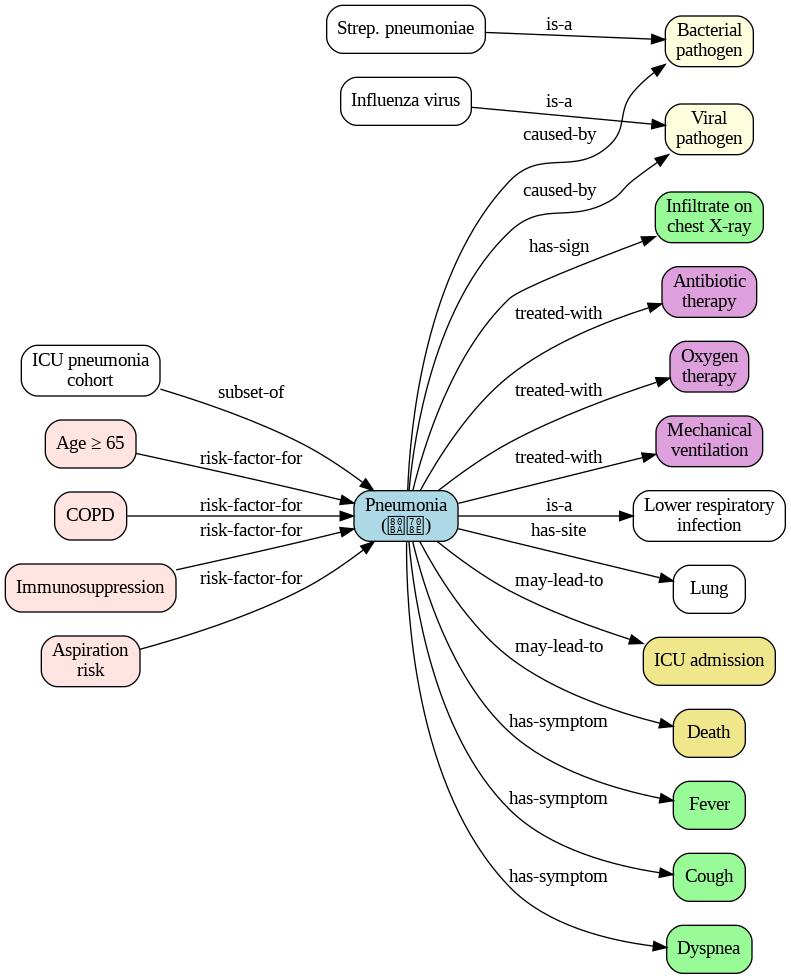

In [31]:

!apt-get -qq install graphviz
!pip install -q graphviz

from graphviz import Digraph
from IPython.display import Image

onto = Digraph('Pneumonia_Ontology', format='png')
onto.attr(rankdir='LR', fontsize='12')
def add_node(g, name, label, color="lightgrey"):
    g.node(
        name,
        label=label,
        shape="box",
        style="filled,rounded",
        fillcolor=color
    )

add_node(onto, "pneumonia", "Pneumonia\n(肺炎)", "lightblue")
add_node(onto, "lower_resp_inf", "Lower respiratory\ninfection", "white")
add_node(onto, "icu_pneumonia", "ICU pneumonia\ncohort", "white")

# 解剖部位
add_node(onto, "lung", "Lung", "white")

# 病原体
add_node(onto, "bacteria", "Bacterial\npathogen", "lightyellow")
add_node(onto, "virus", "Viral\npathogen", "lightyellow")
add_node(onto, "s_pneumo", "Strep. pneumoniae", "white")
add_node(onto, "influenza", "Influenza virus", "white")

# 宿主 / 风险因素
add_node(onto, "age65", "Age ≥ 65", "mistyrose")
add_node(onto, "copd", "COPD", "mistyrose")
add_node(onto, "immuno", "Immunosuppression", "mistyrose")
add_node(onto, "aspiration", "Aspiration\nrisk", "mistyrose")

# 临床表现
add_node(onto, "fever", "Fever", "palegreen")
add_node(onto, "cough", "Cough", "palegreen")
add_node(onto, "dyspnea", "Dyspnea", "palegreen")
add_node(onto, "cxr", "Infiltrate on\nchest X-ray", "palegreen")

# 治疗
add_node(onto, "abx", "Antibiotic\ntherapy", "plum")
add_node(onto, "oxygen", "Oxygen\ntherapy", "plum")
add_node(onto, "vent", "Mechanical\nventilation", "plum")

# 结局
add_node(onto, "icu_admit", "ICU admission", "khaki")
add_node(onto, "death", "Death", "khaki")

# -----------------------------
# 3) 加关系边（注意：这里不要重新赋值）
# -----------------------------

# 疾病层级关系
onto.edge("pneumonia", "lower_resp_inf", label="is-a")
onto.edge("icu_pneumonia", "pneumonia", label="subset-of")

# 解剖位置
onto.edge("pneumonia", "lung", label="has-site")

# 病原体
onto.edge("pneumonia", "bacteria", label="caused-by")
onto.edge("pneumonia", "virus", label="caused-by")
onto.edge("s_pneumo", "bacteria", label="is-a")
onto.edge("influenza", "virus", label="is-a")

# 风险因素（宿主）
onto.edge("age65", "pneumonia", label="risk-factor-for")
onto.edge("copd", "pneumonia", label="risk-factor-for")
onto.edge("immuno", "pneumonia", label="risk-factor-for")
onto.edge("aspiration", "pneumonia", label="risk-factor-for")

# 临床表现
onto.edge("pneumonia", "fever", label="has-symptom")
onto.edge("pneumonia", "cough", label="has-symptom")
onto.edge("pneumonia", "dyspnea", label="has-symptom")
onto.edge("pneumonia", "cxr", label="has-sign")

# 治疗
onto.edge("pneumonia", "abx", label="treated-with")
onto.edge("pneumonia", "oxygen", label="treated-with")
onto.edge("pneumonia", "vent", label="treated-with")

# 结局
onto.edge("pneumonia", "icu_admit", label="may-lead-to")
onto.edge("pneumonia", "death", label="may-lead-to")

output_path = onto.render('Pneumonia_Ontology', cleanup=True)
Image(output_path)
